Import dependencies

In [2]:
#!pip install pydataset

from pydataset import data
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt



Some data transformations in oredr to get differences

In [4]:

df = pd.read_csv("archive/data.csv")
final_df = df[['R_fighter', 'B_fighter', 'Winner', 'weight_class', 'B_current_win_streak', 'B_current_lose_streak', 'B_longest_win_streak', 'B_wins', 'B_losses', 'B_Height_cms',  'B_Reach_cms', 'R_current_win_streak', 'R_current_lose_streak', 'R_longest_win_streak', 'R_wins', 'R_losses', 'R_Height_cms',  'R_Reach_cms', 'R_age', 'B_age' ]].copy()


fight_df = pd.read_csv("archive/raw_fighter_details.csv")


final_df.loc[:, 'R_SLpm'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['SLpM'])
final_df.loc[:, 'B_SLpm'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['SLpM'])

final_df.loc[:, 'R_Strike_Acc'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['Str_Acc'])
final_df.loc[:, 'B_Strike_Acc'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['Str_Acc'])

final_df.loc[:, 'R_SApm'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['SApM'])
final_df.loc[:, 'B_SApm'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['SApM'])

final_df.loc[:, 'R_TD_Avg'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['TD_Avg'])
final_df.loc[:, 'B_TD_Avg'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['TD_Avg'])

final_df.loc[:, 'R_TD_Acc'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['TD_Acc'])
final_df.loc[:, 'B_TD_Acc'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['TD_Acc'])

final_df.loc[:, 'R_Str_Def'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['Str_Def'])
final_df.loc[:, 'B_Str_Def'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['Str_Def'])

final_df.loc[:, 'R_TD_Def'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['TD_Def'])
final_df.loc[:, 'B_TD_Def'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['TD_Def'])

final_df.loc[:, 'R_Sub_Avg'] = final_df['R_fighter'].map(fight_df.set_index('fighter_name')['Sub_Avg'])
final_df.loc[:, 'B_Sub_Avg'] = final_df['B_fighter'].map(fight_df.set_index('fighter_name')['Sub_Avg'])

final_df['R_Strike_Acc_num'] = final_df['R_Strike_Acc'].str.replace('%', '').astype(float)
final_df['B_Strike_Acc_num'] = final_df['B_Strike_Acc'].str.replace('%', '').astype(float)

final_df['R_TD_Acc_num'] = final_df['R_TD_Acc'].str.replace('%', '').astype(float)
final_df['B_TD_Acc_num'] = final_df['B_TD_Acc'].str.replace('%', '').astype(float)

final_df['R_TD_Def_num'] = final_df['R_TD_Def'].str.replace('%', '').astype(float)
final_df['B_TD_Def_num'] = final_df['B_TD_Def'].str.replace('%', '').astype(float)

final_df['R_Str_Def_num'] = final_df['R_Str_Def'].str.replace('%', '').astype(float)
final_df['B_Str_Def_num'] = final_df['B_Str_Def'].str.replace('%', '').astype(float)


#final_df['R_TD_Avg_num'] = final_df['R_TD_Avg'].str.replace('%', '').astype(float)
#final_df['B_TD_Avg_num'] = final_df['B_TD_Avg'].str.replace('%', '').astype(float)

final_df["Winner_Red"] = df["Winner"].apply(lambda x: 1 if x == "Red" else 0)
final_df.columns = final_df.columns.str.strip()

new_df = final_df[['Winner_Red']].copy()


new_df['diff_win_streak'] = final_df['R_current_win_streak'] - final_df['B_current_win_streak']
new_df['diff_lose_streak'] = final_df['R_current_lose_streak'] - final_df['B_current_lose_streak']
new_df['diff_SLpm'] = final_df['R_SLpm'] - final_df['B_SLpm']
new_df['diff_Sub_Avg'] = final_df['R_Sub_Avg'] - final_df['B_Sub_Avg']
new_df['diff_SApm'] = final_df['R_SApm'] - final_df['B_SApm']
new_df['diff_Strike_Acc'] = final_df['R_Strike_Acc_num'] - final_df['B_Strike_Acc_num']
new_df['diff_TD_Avg'] = final_df['R_TD_Avg'] - final_df['B_TD_Avg']
#new_df['diff_TD_Avg'] = final_df['R_TD_Avg'] - final_df['B_TD_Avg']
new_df['diff_TD_Acc'] = final_df['R_TD_Acc_num'] - final_df['B_TD_Acc_num']
new_df['diff_TD_Def'] = final_df['R_TD_Def_num'] - final_df['B_TD_Def_num']
new_df['diff_Str_Def'] = final_df['R_Str_Def_num'] - final_df['B_Str_Def_num']

new_df['diff_reach'] = final_df['R_Reach_cms'] - final_df['B_Reach_cms']
new_df['diff_height'] = final_df['R_Height_cms'] - final_df['B_Height_cms']
new_df['diff_age'] = final_df['R_age'] - final_df['B_age']




#print(final_df.columns.tolist()) 


#final_df
new_df



,Winner_Red,diff_win_streak,diff_lose_streak,diff_SLpm,diff_Sub_Avg,diff_SApm,diff_Strike_Acc,diff_TD_Avg,diff_TD_Acc,diff_TD_Def,diff_Str_Def,diff_reach,diff_height,diff_age
0,1,1,-1,2.45,-0.5,-2.34,3.0,-1.07,-50.0,73.0,4.0,7.62,5.08,-4.0
1,1,0,0,0.28,-1.9,0.13,5.0,-0.38,30.0,46.0,1.0,-5.08,-5.08,-4.0
2,1,3,0,0.05,0.0,-5.00,-1.0,0.00,0.0,46.0,9.0,0.00,0.00,-4.0
3,0,0,0,3.10,-2.0,-0.40,17.0,-4.00,-80.0,60.0,13.0,5.08,7.62,-3.0
4,0,-1,0,-0.87,0.3,1.20,-8.0,-0.32,42.0,-14.0,15.0,-10.16,-12.70,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,0,0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NaN,17.78,NaN
6008,1,0,0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NaN,-10.16,NaN
6009,1,0,0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NaN,-12.70,NaN
6010,1,0,0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN


Making this new dataframe I think I will go off of these differentials and try and predict which fighter will win what.

In [6]:
#Determining the strongest features that correlate with the winner, Since the correlation is weak, using a linear model might not work as well, will use different models.

correlation_with_target = new_df.corr()['Winner_Red'].sort_values(ascending=False)
print(correlation_with_target)



Winner_Red          1.000000
diff_SLpm           0.243541
diff_TD_Def         0.198433
diff_Str_Def        0.193442
diff_Strike_Acc     0.168488
diff_TD_Acc         0.124463
diff_TD_Avg         0.111565
diff_reach          0.066946
diff_height         0.044171
diff_win_streak     0.036841
diff_Sub_Avg        0.012594
diff_lose_streak   -0.046971
diff_SApm          -0.130116
diff_age           -0.170265
Name: Winner_Red, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = new_df.iloc[:, 1:14]
y = new_df.iloc[:, 0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 17, test_size = 0.2)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf = RandomForestClassifier()

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = rf.predict(X_test)

In [14]:
rf.score(X_test, y_test)

0.6674979218620116

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44       440
           1       0.70      0.84      0.76       763

    accuracy                           0.67      1203
   macro avg       0.63      0.60      0.60      1203
weighted avg       0.65      0.67      0.65      1203



In [17]:
#Lets find out the most important features of this model
features = pd.DataFrame(rf.feature_importances_, index = X.columns)
features

,0
diff_SLpm,0.138317
diff_Sub_Avg,0.076175
diff_SApm,0.115871
diff_Strike_Acc,0.083376
diff_TD_Avg,0.096237
diff_TD_Acc,0.087118
diff_TD_Def,0.095749
diff_Str_Def,0.083912
diff_reach,0.083588
diff_height,0.053075


In [18]:
rf2 = RandomForestClassifier(
    n_estimators = 1000,
    criterion = 'entropy',
    min_samples_split = 10,
    max_depth = 14,
    random_state = 42

)


In [19]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [20]:
rf2.score(X_test, y_test)

0.6708229426433915

In [21]:
y_pred2 = rf2.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.32      0.41       440
           1       0.69      0.87      0.77       763

    accuracy                           0.67      1203
   macro avg       0.64      0.60      0.59      1203
weighted avg       0.65      0.67      0.64      1203



Adding more classifiers and hyperparameters to the classifier did not help thus the model will just be the original.

In [24]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'model.pkl')  # 'rf' is your trained model

['model.pkl']

In [25]:
# Want to try XGBoost to see if I can maybe make a better predictor
!pip install --upgrade xgboost
import xgboost

In [26]:
xgboost.XGBClassifier().get_params() #find parameters for model

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [27]:
from xgboost.callback import EarlyStopping
model_xgboost = xgboost.XGBClassifier(learning_rate = 0.1, 
                                      max_depth = 5, 
                                      n_estimators = 5000,
                                      
                                      subsample = 0.5,
                                      colsample_bytree = 0.5,
                                      eval_metric = 'auc',
                                      early_stopping_rounds = 10,
                                      verbosity = 1
                                    
                                    
                                    
                                     )
eval_set = [(X_test, y_test)]
model_xgboost.fit(X_train,
                  y_train,
                  eval_set = eval_set,
                  verbose = True
                 )



[0]	validation_0-auc:0.61981
[1]	validation_0-auc:0.65458
[2]	validation_0-auc:0.68495
[3]	validation_0-auc:0.69325
[4]	validation_0-auc:0.69402
[5]	validation_0-auc:0.69889
[6]	validation_0-auc:0.70104
[7]	validation_0-auc:0.70528
[8]	validation_0-auc:0.70577
[9]	validation_0-auc:0.70780
[10]	validation_0-auc:0.70988
[11]	validation_0-auc:0.71422
[12]	validation_0-auc:0.71550
[13]	validation_0-auc:0.71764
[14]	validation_0-auc:0.71812
[15]	validation_0-auc:0.71942
[16]	validation_0-auc:0.71915
[17]	validation_0-auc:0.71747
[18]	validation_0-auc:0.71803
[19]	validation_0-auc:0.71779
[20]	validation_0-auc:0.71800
[21]	validation_0-auc:0.71692
[22]	validation_0-auc:0.71662
[23]	validation_0-auc:0.71739
[24]	validation_0-auc:0.71530


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_test_pred = model_xgboost.predict_proba(X_test)[:,1]
print("AUC Train: {:.4f}\nAUC test: {:.4f}".format(
    roc_auc_score(y_train, y_train_pred),
    roc_auc_score(y_test, y_test_pred)
))

AUC Train: 0.7970
AUC test: 0.7194


In [29]:
learning_rate_list = [0.01, 0.02, 0.05, 0.1, 0.2]
max_depth_list = [2, 3, 5, 7, 10]
n_estimators_list = [500, 1000, 2000, 3000, 4000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list
              }


In [30]:
'''def my_roc_auc_score(model,X,y): 
    return roc_auc_score(y,model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator = xgboost.XGBClassifier(subsample = 0.5,
                                                                 colsample_bytree = 0.25,
                                                                 eval_metric = 'auc',
                                                                 use_label_encoder = False
                                                                 ),
                                param_grid = params_dict,
                                cv = 2,
                                scoring = my_roc_auc_score,
                                return_train_score=True,
                                verbose = 4
                            
                               )

model_xgboost_hp.fit(X,y)
'''

"def my_roc_auc_score(model,X,y): \n    return roc_auc_score(y,model.predict_proba(X)[:,1])\n\nmodel_xgboost_hp = GridSearchCV(estimator = xgboost.XGBClassifier(subsample = 0.5,\n                                                                 colsample_bytree = 0.25,\n                                                                 eval_metric = 'auc',\n                                                                 use_label_encoder = False\n                                                                 ),\n                                param_grid = params_dict,\n                                cv = 2,\n                                scoring = my_roc_auc_score,\n                                return_train_score=True,\n                                verbose = 4\n                            \n                               )\n\nmodel_xgboost_hp.fit(X,y)\n"

In [31]:
'''df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score',
                               'mean_test_score',
                               'mean_train_score', 
                               'param_learning_rate',
                               'param_max_depth',
                               'param_n_estimators']]
df_cv_results.sort_values(by = 'rank_test_score', inplace = True)
df_cv_results'''

"df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)\ndf_cv_results = df_cv_results[['rank_test_score',\n                               'mean_test_score',\n                               'mean_train_score', \n                               'param_learning_rate',\n                               'param_max_depth',\n                               'param_n_estimators']]\ndf_cv_results.sort_values(by = 'rank_test_score', inplace = True)\ndf_cv_results"

# Making final model with the best parameters
Now we know what the best hyperparameters are for this predictor, even though it didn't budge, we now know the best.

In [33]:
model_xgboost_final = xgboost.XGBClassifier(learning_rate = 0.1, 
                                      max_depth = 2, 
                                      n_estimators = 1000,
                                      subsample = 0.5,
                                      colsample_bytree = 0.5,
                                      eval_metric = 'auc',
                                      early_stopping_rounds = 50,
                                      verbosity = 1
                                    
                                    
                                    
                                     )
eval_set_fin = [(X_test, y_test), (X_train, y_train)]
model_xgboost_final.fit(X_train,
                  y_train,
                  eval_set = eval_set_fin,
                  verbose = True
                 )

[0]	validation_0-auc:0.61548	validation_1-auc:0.62459
[1]	validation_0-auc:0.66381	validation_1-auc:0.66710
[2]	validation_0-auc:0.68312	validation_1-auc:0.69021
[3]	validation_0-auc:0.69009	validation_1-auc:0.70412
[4]	validation_0-auc:0.69635	validation_1-auc:0.71084
[5]	validation_0-auc:0.70421	validation_1-auc:0.72129
[6]	validation_0-auc:0.70780	validation_1-auc:0.72404
[7]	validation_0-auc:0.70965	validation_1-auc:0.72718
[8]	validation_0-auc:0.70888	validation_1-auc:0.72771
[9]	validation_0-auc:0.71385	validation_1-auc:0.73187
[10]	validation_0-auc:0.71230	validation_1-auc:0.73580
[11]	validation_0-auc:0.71469	validation_1-auc:0.73639
[12]	validation_0-auc:0.71593	validation_1-auc:0.73666
[13]	validation_0-auc:0.71775	validation_1-auc:0.73802
[14]	validation_0-auc:0.71424	validation_1-auc:0.73990
[15]	validation_0-auc:0.71327	validation_1-auc:0.74083
[16]	validation_0-auc:0.71306	validation_1-auc:0.74037
[17]	validation_0-auc:0.71202	validation_1-auc:0.74155
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_train_pred_fin = model_xgboost_final.predict_proba(X_train)[:,1]
y_test_pred_fin = model_xgboost_final.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC test: {:.4f}".format(
    roc_auc_score(y_train, y_train_pred_fin),
    roc_auc_score(y_test, y_test_pred_fin)
))

AUC Train: 0.8707
AUC test: 0.6936


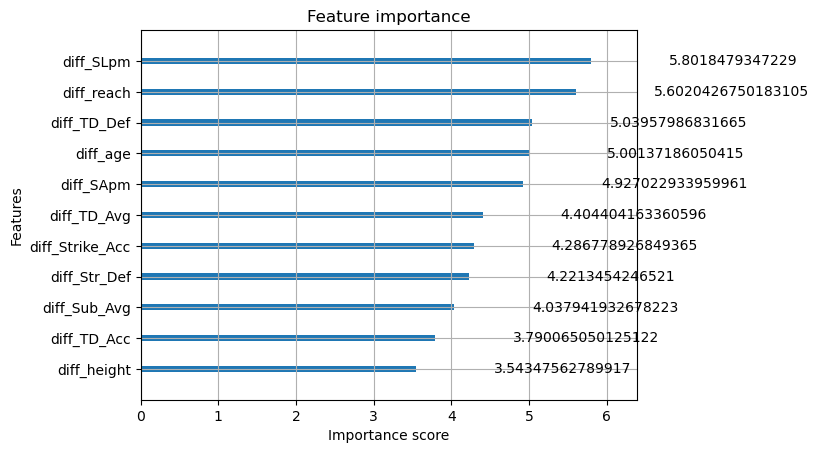

In [42]:
from xgboost import plot_importance
plot_importance(model_xgboost_final, importance_type='gain')  # You can change 'gain' to 'weight' or 'cover'
plt.show()

In [44]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier()

# Apply RFE to select top N features
selector = RFE(model, n_features_to_select=10)  # Adjust n_features_to_select
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['diff_SLpm', 'diff_Sub_Avg', 'diff_SApm', 'diff_Strike_Acc',
       'diff_TD_Avg', 'diff_TD_Acc', 'diff_TD_Def', 'diff_Str_Def',
       'diff_reach', 'diff_age'],
      dtype='object')
